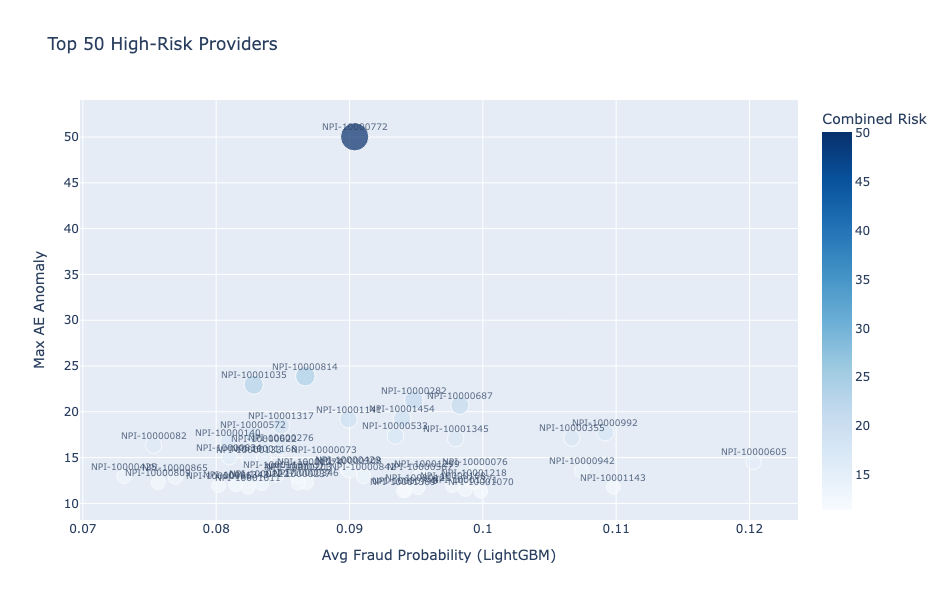

In [5]:
import pandas as pd
import plotly.express as px

df_provider = pd.read_csv("../data/processed/sim_provider_risk.csv")

# Sort and select TOP 50 by combined risk
df_top50 = df_provider.sort_values("combined_risk", ascending=False).head(50)

fig = px.scatter(
    df_top50,
    x="avg_fraud",
    y="max_anomaly",
    size="combined_risk",
    color="combined_risk",
    color_continuous_scale="Blues",
    title="Top 50 High-Risk Providers",
    labels={
        "avg_fraud": "Avg Fraud Probability (LightGBM)",
        "max_anomaly": "Max AE Anomaly",
        "combined_risk": "Combined Risk",
    }
)

# Annotate provider IDs
for _, row in df_top50.iterrows():
    fig.add_annotation(
        x=row["avg_fraud"],
        y=row["max_anomaly"],
        text=row["provider_id"],
        showarrow=False,
        yshift=10,
        font=dict(size=9),
        opacity=0.7
    )

fig.update_layout(width=900, height=600)
fig.show()
